<a href="https://colab.research.google.com/github/shubham5027/Customer-Segmentation-using-Machine-Learning/blob/main/Untitled65.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  plotly.express as px
import sklearn

In [ ]:
df=pd.read_csv("/content/Customer Data.csv")

In [ ]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [ ]:
df.max()

CUST_ID                                  C19190
BALANCE                             19043.13856
BALANCE_FREQUENCY                           1.0
PURCHASES                              49039.57
ONEOFF_PURCHASES                       40761.25
INSTALLMENTS_PURCHASES                  22500.0
CASH_ADVANCE                        47137.21176
PURCHASES_FREQUENCY                         1.0
ONEOFF_PURCHASES_FREQUENCY                  1.0
PURCHASES_INSTALLMENTS_FREQUENCY            1.0
CASH_ADVANCE_FREQUENCY                      1.5
CASH_ADVANCE_TRX                            123
PURCHASES_TRX                               358
CREDIT_LIMIT                            30000.0
PAYMENTS                            50721.48336
MINIMUM_PAYMENTS                    76406.20752
PRC_FULL_PAYMENT                            1.0
TENURE                                       12
dtype: object

In [ ]:
df.min()

CUST_ID                               C10001
BALANCE                                  0.0
BALANCE_FREQUENCY                        0.0
PURCHASES                                0.0
ONEOFF_PURCHASES                         0.0
INSTALLMENTS_PURCHASES                   0.0
CASH_ADVANCE                             0.0
PURCHASES_FREQUENCY                      0.0
ONEOFF_PURCHASES_FREQUENCY               0.0
PURCHASES_INSTALLMENTS_FREQUENCY         0.0
CASH_ADVANCE_FREQUENCY                   0.0
CASH_ADVANCE_TRX                           0
PURCHASES_TRX                              0
CREDIT_LIMIT                            50.0
PAYMENTS                                 0.0
MINIMUM_PAYMENTS                    0.019163
PRC_FULL_PAYMENT                         0.0
TENURE                                     6
dtype: object

In [ ]:
df.shape

(8950, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
!pip install feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.9/328.9 kB 3.5 MB/s eta 0:00:00


In [ ]:
from feature_engine.imputation import MeanMedianImputer
impute=MeanMedianImputer()
df=impute.fit_transform(df)

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
import plotly.express as px

fig = px.histogram(df, x='BALANCE', nbins=50, title='Distribution of Balance')
fig.show()

In [ ]:
px.scatter(df, x='BALANCE', y='PURCHASES', color='CREDIT_LIMIT',
                  title='Balance vs Purchases Colored by Credit Limit')

In [ ]:
#Correlation Matrix
import plotly.figure_factory as ff

correlation_matrix = df.corr()
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.to_numpy(),
    x=list(correlation_matrix.columns),
    y=list(correlation_matrix.index),
    annotation_text=correlation_matrix.round(2).values,
    colorscale='Viridis',
)
fig.update_layout(title='Correlation Matrix')
fig.show()


<ipython-input-15-6a6cf0a4cd83>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
#pairwise relationships
fig = px.scatter_matrix(df)
fig.update_layout(title='Pairwise Relationships')
fig.show()

In [ ]:
#category-based distributions
px.box(df, x='TENURE', y='BALANCE', points="all", title='Boxplot of Balance by Tenure')

In [ ]:
fig = px.scatter(df, x='PURCHASES', y='PAYMENTS', color='TENURE', title='Purchases vs Payments Segmentation by Tenure')
fig.show()


In [ ]:
#frequency analysis of purchase
fig = px.bar(df, x='PURCHASES_FREQUENCY', y='PURCHASES', title='Purchases Frequency')
fig.show()


In [ ]:
# 3d scatter plot
fig = px.scatter_3d(df, x='BALANCE', y='PURCHASES', z='PAYMENTS', color='CREDIT_LIMIT')
fig.show()

In [ ]:
# Parallel Coordinates Plot
px.parallel_coordinates(df, color='PURCHASES_FREQUENCY')


In [ ]:
# Sunburst Chart for Purchase Categories
px.sunburst(df, path=['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY'],title='Purchase Categories Sunburst Chart')


In [ ]:
px.scatter(df, x='CASH_ADVANCE', y='BALANCE', animation_frame='TENURE', size='CASH_ADVANCE_TRX',
color='PURCHASES_TRX', hover_name='CREDIT_LIMIT', log_x=True, log_y=True,
title='Animate Buubble Chart for Cash Advance')

In [ ]:
#preproceesing data:
#scaling
#dimention reduction
#outlier reduction

In [ ]:
df=df.drop(['CUST_ID'],axis=1) #dropping cust_id col

In [ ]:
df.max()

BALANCE                             19043.13856
BALANCE_FREQUENCY                       1.00000
PURCHASES                           49039.57000
ONEOFF_PURCHASES                    40761.25000
INSTALLMENTS_PURCHASES              22500.00000
CASH_ADVANCE                        47137.21176
PURCHASES_FREQUENCY                     1.00000
ONEOFF_PURCHASES_FREQUENCY              1.00000
PURCHASES_INSTALLMENTS_FREQUENCY        1.00000
CASH_ADVANCE_FREQUENCY                  1.50000
CASH_ADVANCE_TRX                      123.00000
PURCHASES_TRX                         358.00000
CREDIT_LIMIT                        30000.00000
PAYMENTS                            50721.48336
MINIMUM_PAYMENTS                    76406.20752
PRC_FULL_PAYMENT                        1.00000
TENURE                                 12.00000
dtype: float64

In [ ]:
#oulier handling
# from feature_engine.outliers import Winsorizer
# column = ['BALANCE', 'PURCHASES']
# out = Winsorizer(capping_method='gaussian', variables=column)
# df_out = out.fit_transform(df)

In [ ]:
# px.box(df_out,x='TENURE',y='BALANCE')
# px.box(df_out,x='TENURE',y='PURCHASES')

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
scaled_df=Scaler.fit_transform(df)

In [ ]:
scaled_df

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

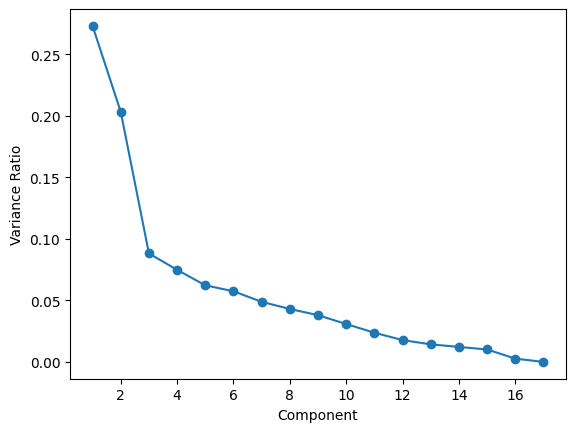

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_df)

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Component')
plt.ylabel('Variance Ratio')
plt.show()

Graph showing aftet 2nd components its  decesing aggresively so taking 2 compents or dimention

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df_pca=pca.fit_transform(scaled_df)
df_pca=pd.DataFrame(data=df_pca,columns=['PCA1','PCA2']) #convrt to dataframe

In [ ]:
df_pca

PCA1      PCA2
0    -1.683648 -1.072245
1    -1.134083  2.509131
2     0.969400 -0.383621
3    -0.888221  0.004656
4    -1.600021 -0.683799
...        ...       ...
8945 -0.362573 -2.013428
8946 -0.580809 -1.675668
8947 -0.928986 -1.808043
8948 -2.337846 -0.653601
8949 -0.558025 -0.400659

[8950 rows x 2 columns]

In [ ]:
#elbow method
from sklearn.cluster import KMeans

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

In [ ]:
px.line(x=range(1, 11), y=inertia,labels={'x': 'Clusters', 'y': 'Inertia'},markers=True)

In [ ]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=4,verbose=1)
model.fit_predict(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia 118402.52236047386.
Iteration 1, inertia 104115.65223269447.
Iteration 2, inertia 102024.85528630813.
Iteration 3, inertia 100421.66210913235.
Iteration 4, inertia 99741.87728768904.
Iteration 5, inertia 99454.03940754272.
Iteration 6, inertia 99312.879860928.
Iteration 7, inertia 99233.76963906389.
Iteration 8, inertia 99185.98670782718.
Iteration 9, inertia 99141.26108193438.
Iteration 10, inertia 99100.50937657384.
Iteration 11, inertia 99078.83731901096.
Iteration 12, inertia 99071.40171378737.
Iteration 13, inertia 99068.63802274797.
Iteration 14, inertia 99066.35527977197.
Iteration 15, inertia 99063.9466335657.
Iteration 16, inertia 99063.174475735.
Iteration 17, inertia 99062.9700867256.
Iteration 18, inertia 99062.55007602685.
Iteration 19, inertia 99062.03598645121.
Iteration 20, inertia 99061.94356361014.
Converged at iteration 20: center shift 4.353272177708942e-06 within tolerance 0.00010000000000000038.
Initialization complete


array([3, 1, 0, ..., 0, 3, 3], dtype=int32)

In [ ]:
df_cluster=pd.concat([df_pca,pd.DataFrame({'cluster':model.labels_})],axis=1)

In [ ]:
px.scatter(df_cluster, x='PCA1', y='PCA2', color='cluster',
                 title='Clusters Plot')

In [ ]:
cluster_centers = pd.DataFrame(data=model.cluster_centers_,columns=[df.columns])

In [ ]:
cluster_centers = Scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':model.labels_})],axis=1)
cluster_df.to_csv("cluster_customer_data.csv")

In [ ]:
cluster_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787          0.000000      12        3  
1     4103.032597       1072.340217          0.222222      12        1  
2      622.066742        627.284787          0.000000      12        0  
3        0.000000        312.343947          0.000000      12        3  
4      678.334763        244.791237          0.000000      12        3  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        0  
89

In [ ]:
#now our data become supervised learning problem(classfication) having parameters and clusters as a target column


In [ ]:
X=cluster_df.drop(['Cluster'],axis=1)
y=cluster_df['Cluster']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)
models

 97%|█████████▋| 28/29 [00:49<00:04,  4.11s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2359
[LightGBM] [Info] Number of data points in the train set: 7160, number of used features: 17
[LightGBM] [Info] Start training from score -0.975258
[LightGBM] [Info] Start training from score -2.012462
[LightGBM] [Info] Start training from score -3.074147
[LightGBM] [Info] Start training from score -0.814148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


100%|██████████| 29/29 [00:53<00:00,  1.86s/it]


Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
NearestCentroid                    1.00               1.00    None      1.00   
LogisticRegression                 0.99               0.98    None      0.99   
SVC                                0.98               0.97    None      0.98   
XGBClassifier                      0.97               0.96    None      0.97   
LinearSVC                          0.96               0.96    None      0.96   
LGBMClassifier                     0.97               0.95    None      0.97   
SGDClassifier                      0.96               0.95    None      0.96   
Perceptron                         0.93               0.94    None      0.93   
RandomForestClassifier             0.96               0.94    None      0.96   
ExtraTreesClassifier               0.96               0.94    None      0.96   
GaussianNB                         0.92               0.93    None      0.93   
BaggingClassifier                  0.95               0.93    None      0.95   
AdaBoostClassifier                 0.93               0.92    None      0.93   
DecisionTreeClassifier             0.93               0.92    None      0.93   
LabelPropagation                   0.95               0.92    None      0.95   
LabelSpreading                     0.95               0.92    None      0.95   
KNeighborsClassifier               0.95               0.91    None      0.95   
CalibratedClassifierCV             0.95               0.90    None      0.95   
QuadraticDiscriminantAnalysis      0.91               0.90    None      0.91   
PassiveAggressiveClassifier        0.94               0.87    None      0.94   
LinearDiscriminantAnalysis         0.94               0.87    None      0.94   
ExtraTreeClassifier                0.91               0.85    None      0.91   
BernoulliNB                        0.84               0.84    None      0.85   
RidgeClassifier                    0.90               0.77    None      0.89   
RidgeClassifierCV                  0.90               0.77    None      0.89   
DummyClassifier                    0.45               0.25    None      0.28   

                               Time Taken  
Model                                      
NearestCentroid                      0.09  
LogisticRegression                   0.82  
SVC                                  3.17  
XGBClassifier                       15.98  
LinearSVC                            1.54  
LGBMClassifier                       4.02  
SGDClassifier                        0.38  
Perceptron                           0.11  
RandomForestClassifier               5.83  
ExtraTreesClassifier                 1.44  
GaussianNB                           0.11  
BaggingClassifier                    0.60  
AdaBoostClassifier                   0.67  
DecisionTreeClassifier               0.15  
LabelPropagation                     4.78  
LabelSpreading                       9.94  
KNeighborsClassifier                 0.75  
CalibratedClassifierCV               2.60  
QuadraticDiscriminantAnalysis        0.10  
PassiveAggressiveClassifier          0.13  
LinearDiscriminantAnalysis           0.19  
ExtraTreeClassifier                  0.04  
BernoulliNB                          0.05  
RidgeClassifier                      0.12  
RidgeClassifierCV                    0.06  
DummyClassifier                      0.03

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(multi_class='multinomial', solver='lbfgs')
lr.fit(X_train,y_train)
y_predict=lr.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       666
           1       0.83      0.76      0.79       240
           2       0.54      0.67      0.60        78
           3       0.88      0.87      0.87       806

    accuracy                           0.84      1790
   macro avg       0.77      0.79      0.78      1790
weighted avg       0.84      0.84      0.84      1790



In [ ]:
from sklearn.svm import SVC
svc=SVC( decision_function_shape='ovr')
svc.fit(X_train,y_train)
y_p=svc.predict(X_test)
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       666
           1       0.87      0.75      0.81       240
           2       0.87      0.88      0.88        78
           3       0.77      0.87      0.82       806

    accuracy                           0.81      1790
   macro avg       0.84      0.81      0.82      1790
weighted avg       0.81      0.81      0.80      1790



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rc=RandomForestClassifier()
rc.fit(X_train,y_train)
y_pr=rc.predict(X_test)
print(classification_report(y_test,y_pr))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       666
           1       0.96      0.90      0.93       240
           2       0.99      0.91      0.95        78
           3       0.96      0.96      0.96       806

    accuracy                           0.96      1790
   macro avg       0.96      0.94      0.95      1790
weighted avg       0.96      0.96      0.96      1790



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train)
y_predicts=rc.predict(X_test)
print(classification_report(y_test,y_predicts))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       666
           1       0.96      0.90      0.93       240
           2       0.99      0.91      0.95        78
           3       0.96      0.96      0.96       806

    accuracy                           0.96      1790
   macro avg       0.96      0.94      0.95      1790
weighted avg       0.96      0.96      0.96      1790



In [ ]:
!pip install xgboost

In [ ]:
# from sklearn.model_selection import  cross_val_score
# import xgboost as xgb

# params = {
#     'objective': 'multi:softmax',
#     'num_class': 4,
#     'eta': 0.1,
#     'max_depth': 4,
#     'eval_metric': 'mlogloss'
# }

# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

# cv_results = xgb.cv(params, dtrain, num_boost_round=100, nfold=5, metrics='mlogloss', early_stopping_rounds=10)
# optimal_num_rounds = cv_results.shape[0]

# model_xgb = xgb.train(params, dtrain, num_boost_round=optimal_num_rounds)
# predictions = model_xgb.predict(dtest)

In [ ]:
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy",accuracy)
# print( classification_report(y_test, predictions))

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import pickle
import joblib

Mounted at /content/gdrive


In [ ]:
#clustering model
joblib.dump(model,"kmeans_2.pkl")

['kmeans.pkl']

In [ ]:
#classification model
filename = '/content/gdrive/MyDrive/rc_model_3.sav'
pickle.dump(rc, open(filename, 'wb'))


In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result,'% Acuuracy')

0.9558659217877095 % Acuuracy


In [ ]:
joblib.dump(rc,"/content/gdrive/MyDrive/rc.pkl")

['/content/gdrive/MyDrive/rc.pkl']

In [ ]:
scaled_df.shape

(8950, 17)